In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Hamiltonian transformation to fluxonium and resonator modes

In [2]:
# Fundamental constants
h    = 6.62607015e-34
GHz  = 1e9
e0   = 1.602176634e-19
Φ_0 = h/(2*e0)

In [3]:
c, cJ, Lq, Lr, Δ = symbols('C, C_J^{\'}, L_q, L_r, Delta', real=True, positive=True, nonzero=True)
Lp = Lq/2 + Δ
Lm = Lq/2 - Δ
γ = simplify( 1/(Lp*Lm) / (1/Lr + 1/Lp + 1/Lm) )
# print_latex(γ)
γ
l = 4*Lr/γ
l

-4*Delta**2 + L_q**2 + 4*L_q*L_r

In [4]:
L = Matrix([[ 1/Lm,      0,  -1/Lm             ],
            [    0,   1/Lp,  -1/Lp             ],
            [-1/Lm,  -1/Lp,  1/Lr + 1/Lp + 1/Lm]])

P1 = Matrix([[ 1,        0,  0],
             [ 0,        1,  0],
             [ γ*Lp,  γ*Lm,  0]])

C = Matrix([[c+cJ,   -cJ],
            [ -cJ,  c+cJ]])

P2 = 0.5 * Matrix([[ 1,   1],
                   [ 1,  -1]])

In [5]:
C1 = C

In [6]:
L1 = nsimplify(simplify( P1.T * L * P1) )
L1 = L1[0:2,0:2]
L1

Matrix([
[2*(-2*Delta - L_q - 2*L_r)/(4*Delta**2 - L_q**2 - 4*L_q*L_r),                     4*L_r/(4*Delta**2 - L_q**2 - 4*L_q*L_r)],
[                     4*L_r/(4*Delta**2 - L_q**2 - 4*L_q*L_r), 2*(2*Delta - L_q - 2*L_r)/(4*Delta**2 - L_q**2 - 4*L_q*L_r)]])

In [7]:
C2 = nsimplify(simplify( P2.T * C1 * P2) )
C2

Matrix([
[C/2,             0],
[  0, C/2 + C_J^{'}]])

In [8]:
L2 = nsimplify(simplify( P2.T * L1 * P2) )
L2

Matrix([
[    L_q/(-4*Delta**2 + L_q**2 + 4*L_q*L_r),       2*Delta/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)],
[2*Delta/(-4*Delta**2 + L_q**2 + 4*L_q*L_r), (L_q + 4*L_r)/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)]])

In [9]:
w1 = 1/sqrt(C2[0,0]*L2[0,0]**-1)
w2 = 1/sqrt(C2[1,1]*L2[1,1]**-1)
(w1/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf(), (w2/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

(0.00720838819651165, 0.00630355261686479)

In [13]:
P3, D = (C2**-1 * L2 ).diagonalize()

In [14]:
C3 = nsimplify(simplify( P3.T * C2 * P3 ) )
C3

Matrix([
[C/2 + C_J^{'} + (-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2))**2/(8*C*Delta**2),                                                                                                                                                                  0],
[                                                                                                                                                                  0, C/2 + C_J^{'} + (2*C*L_r - C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2))**2/(8*C*Delta**2)]])

In [15]:
L3 = nsimplify(simplify( P3.T * L2 * P3 ) )
L3

Matrix([
[(4*C**2*Delta**2*(L_q + 4*L_r) + 4*C*Delta**2*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)) + (4*C*Delta**2 + L_q*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)))*(-2*C*L_r + C_J^{'}*L_q + sqrt(4*C**2*Delta**2 + 4*C**2*L_r**2 + 8*C*C_J^{'}*Delta**2 - 4*C*C_J^{'}*L_q*L_r + C_J^{'}**2*L_q**2)))/(4*C**2*Delta**2*(-4*Delta**2 + L_q**2 + 4*L_q*L_r)),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [16]:
w1 = 1/sqrt(C3[0,0]*L3[0,0]**-1)
w2 = 1/sqrt(C3[1,1]*L3[1,1]**-1)
(w1/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf(),  (w2/2/np.pi).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

(0.00720867642830948, 0.00630322299598601)

In [31]:
(P3[0,0]).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()
(P3[0,0]).subs({c:15, cJ:18, Lq:25, Lr:10})

(sqrt(3060*Delta**2 + 22500) + 150)/(30*Delta)

In [32]:
(P3[0,1]**-1).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()
(P3[0,1]**-1).subs({c:15, cJ:18, Lq:25, Lr:10})

30*Delta/(150 - sqrt(3060*Delta**2 + 22500))

In [4]:
Φ_1, Φ_2, Φ_3 = symbols('Phi_1,Phi_2,Phi_3', real=True, positive=True, nonzero=True)


In [11]:
simplify( 4*Lr/l*(Lp*Φ_1 + Lm*Φ_2) )

2*L_r*(Phi_1*(2*Delta + L_q) - Phi_2*(2*Delta - L_q))/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)

In [10]:
simplify( 2*Lr*Lq/l *(Φ_1 + Φ_2) + 4*Lr/l*Δ*(Φ_1 - Φ_2))

2*L_r*(2*Delta*(Phi_1 - Phi_2) + L_q*(Phi_1 + Phi_2))/(-4*Delta**2 + L_q**2 + 4*L_q*L_r)

In [38]:
m = 1/2 * (c*2*Lr*Lq/l)**-1
m = 1/2 * (c*4*Lr/l*Δ)**-1

In [39]:
k = 2 / Lr

In [44]:
sqrt(k/m).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

0.790826887582724*I

In [31]:
sqrt(Lr * c*2*Lr*Lq/l).subs({c:15, cJ:18, Lq:25, Lr:10, Δ:0.1}).evalf()

6.79374582071531

# Perturbation theory of the inductive coupling between the resonator and the fluxonium

In [42]:
# Circuit parameters
Csh = 15
C = 15
Cg = 10
CJ = 3
Lq = 25
Lr = 10
Δ = 0.1
EJ = 10.0
l = Lq * (Lq + 4 * Lr) - 4 * Δ ** 2

E_J = EJ * 1e9
L_r = l / Lq * 1e-9
E_L_r = (Φ_0 / (2 * np.pi)) ** 2 / L_r / h
Cf = C / 2 + Csh + CJ
Lf = l / (Lq + 4 * Lr)
C_f = Cf * 1e-15
L_f = Lf * 1e-9
Z_f = np.sqrt(L_f / C_f)

mf = Lf
m_f = L_f
ωf = 1/np.sqrt(Lf * Cf)
ω_f = 1/np.sqrt(L_f * C_f)

Lr = l / Lq
L_r = l / Lq * 1e-9
Cr = C / 2
C_r = C / 2 * 1e-15
Z_r = np.sqrt(L_r / C_r)

mr = Lr
m_r = L_r
ωr = 1/np.sqrt(Lr * Cr)
ω_r = 1/np.sqrt(L_r * C_r)

l_Δ = Lq*(Lq+4*Lr) - 4*Δ**2
L_q = l_Δ / (Lq + 4 * Lr) * 1e-9
E_L_f = (Φ_0 / (2 * np.pi)) ** 2 / L_q / h

In [43]:
φ_ext = 0.5

In [84]:
dVdφ =  lambda φ: E_L_f*φ + E_J*np.sin(φ+np.pi)
φ_min = sp.optimize.fsolve(dVdφ, 1)[0]
φ_min

1.5280032757128938

In [85]:
# Symbolic independent variable
φ_f = symbols('varphi_f') # Phase of the fluxonium
φ_r = symbols('varphi_r') # Phase of the fluxonium

# Symbolic functions
V_f  = Function('V_f')(φ_f)  # Fluxonium potential
V_r  = Function('V_f')(φ_r)  # Resonator potential

L = Function('L')(φ_f)    # Left and right gaussian states for the fluxonium
R  = Function('R')(φ_f)

Φ_f_0 = Function('Phi_f^0')(φ_f)  # Eigenstates of te qubit
Φ_f_1 = Function('Phi_f^1')(φ_f)  # Eigenstates of te qubit
Φ_r_0 = Function('Phi_r^0')(φ_r)  # Eigenstates of te qubit
Φ_r_1 = Function('Phi_r^1')(φ_r)  # Eigenstates of te qubit

In [86]:
# Potentials
V_f = 0.5 * E_L_f * (φ_f) ** 2 - E_J * cos(φ_f - φ_ext * 2 * np.pi)
V_r = 0.5 * E_L_r * φ_r **2

In [87]:
# Harmonic approximation wave functions of the fluxonium
L = (m_r * ω_r * 1e-3 / pi) ** (1 / 4) * exp(-m_r * ω_r * 1e-3 * (φ_f + φ_min) ** 2 / 2)
R = (m_r * ω_r * 1e-3 / pi) ** (1 / 4) * exp(-m_r * ω_r * 1e-3 * (φ_f - φ_min) ** 2 / 2)
Φ_f_0 = L + R
Φ_f_1 = L - R

In [93]:
# Symbolic to numpy for plots
φ_f_np = np.linspace(-2.5,2.5,100)

V_f_np  = np.array([ V_f.subs([(φ_f,φ_f_np[i])]).evalf() for i in range(len(φ_f_np)) ])

L_np  = np.array([ L.subs([(φ_f,φ_f_np[i])]).evalf() for i in range(len(φ_f_np)) ])
R_np  = np.array([ R.subs([(φ_f,φ_f_np[i])]).evalf() for i in range(len(φ_f_np)) ])

Φ_f_0_np = np.array([ Φ_f_0.subs([(φ_f,φ_f_np[i])]).evalf() for i in range(len(φ_f_np)) ])
Φ_f_1_np = np.array([ Φ_f_1.subs([(φ_f,φ_f_np[i])]).evalf() for i in range(len(φ_f_np)) ])


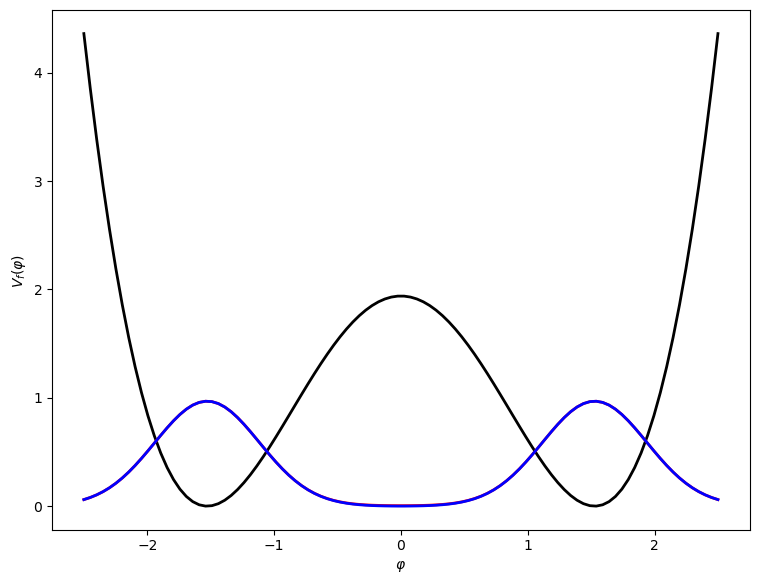

In [94]:
# Potential plots
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(6*1.5, 4.5*1.5))
ax.set_xlabel(r'$\varphi$ ')
ax.set_ylabel(r'$V_f(\varphi)$ ')

ax.plot( φ_f_np, (V_f_np-V_f_np.min())/1e9,  color = 'k', linewidth = 2 )
ax.plot( φ_f_np, Φ_f_0_np**2,  color = 'r', linewidth = 2 )
ax.plot( φ_f_np, Φ_f_1_np**2,  color = 'b', linewidth = 2 )
plt.show()

In [32]:
Lq, Lr, Lq_prime, Lr_prime, Δ, x, y = symbols('Lq Lr Lq\' Lr\' \Delta x y')

In [33]:
eq1 = Eq( Lq*(Lq+4*Lr) / (Lq+4*Lr), (Lq_prime*(Lq_prime+4*Lr_prime)-4*Δ**2)/(Lq_prime+4*Lr_prime))
eq2 = Eq( Lq*(Lq+4*Lr) / Lq,        (Lq_prime*(Lq_prime+4*Lr_prime)-4*Δ**2)/(Lq_prime))

# Solve the equations
solution = solve((eq1, eq2), (Lq_prime, Lr_prime))

In [36]:
solution[0][0].subs({Lq:25, Lr:10, Δ:0.1})

-0.000615369468201621

In [45]:
solution[1]#[1].subs({Lq:25, Lr:10, Δ:0.1})

((Lq*(Lq + 4*Lr) + sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*\Delta**2)))/(2*(Lq + 4*Lr)),
 Lr*(Lq*(Lq + 4*Lr) + sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*\Delta**2)))/(2*Lq*(Lq + 4*Lr)))